### Primary File to Run the BSE $^1$

$^1$ https://github.com/davecliff/BristolStockExchange

In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import csv
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.gridspec as gridspec


from BSE import market_session

Define basic features on the market 

In [6]:
start_time = 0
end_time = 60 * 10
order_interval = 1
chart1_range=(80, 320)
range1=(10, 190)
range2=(200, 320)
range3=(20, 320)


Standard Setup

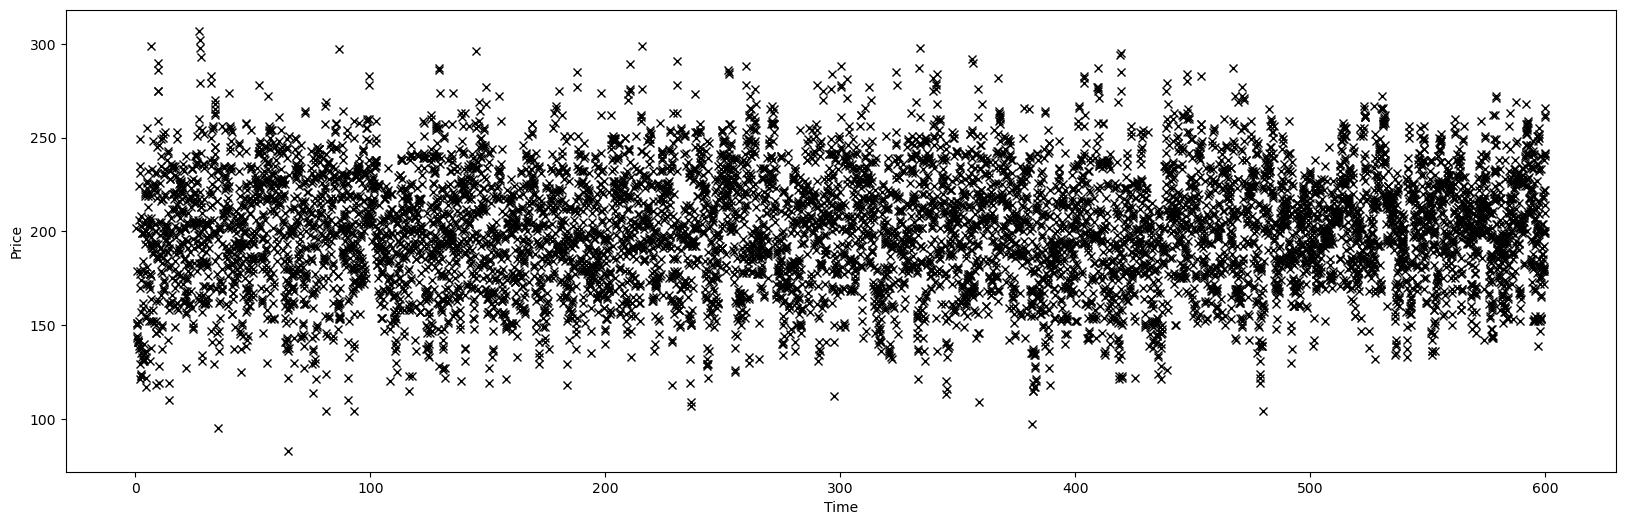

In [7]:
#Standard market conditions 
quantity = 10
#sellers_spec = [('GVWY', quantity)]
#buyers_spec = [('GVWY', quantity) ]

sellers_spec = [('MarketMaker', quantity), ('ZIP', quantity), ('GVWY', quantity), ('ZIC', quantity), ('SHVR', quantity), ('SNPR', quantity)]
buyers_spec = [('MarketMaker', quantity), ('ZIP', quantity), ('GVWY', quantity), ('ZIC', quantity), ('SHVR', quantity), ('SNPR', quantity)]

traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}
supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [chart1_range], 'stepmode': 'random'}]
demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [chart1_range], 'stepmode': 'random'}]

order_schedule = {'sup': supply_schedule, 'dem': demand_schedule,'interval': order_interval, 'timemode': 'drip-poisson', 'fittointerval': True}

verbose = False

dump_flags = {'dump_blotters': True, 'dump_lobs': True, 'dump_strats': True,'dump_avgbals': True, 'dump_tape': True}

n_sessions = 1

x = np.empty(0)
y = np.empty(0)

for sess in range(n_sessions):
    trial_id = 'new_trader_chart_' + str(sess)

    market_session(trial_id, start_time, end_time, traders_spec, order_schedule, dump_flags, verbose)

    prices_fname = trial_id + '_tape.csv'
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[1])
            price = float(row[2])
            x = np.append(x,time)
            y = np.append(y,price)

plt.figure(figsize=(20, 6))
plt.ylabel('Price')
plt.xlabel('Time')
plt.plot(x, y, 'x', color='black');

Multiple sessions with trade data in one file 

In [8]:
'''
start_time = 0
end_time = 60 * 1
order_interval = 10

# Standard market conditions 
quantity = 20
sellers_spec = [('ZIP', quantity)]
buyers_spec = [('ZIP', quantity)]

traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}
supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [chart1_range], 'stepmode': 'fixed'}]
demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [chart1_range], 'stepmode': 'fixed'}]

order_schedule = {
    'sup': supply_schedule,
    'dem': demand_schedule,
    'interval': order_interval,
    'timemode': 'drip-poisson',
    'fittointerval': True
}

verbose = False

dump_flags = {
    'dump_blotters': False,
    'dump_lobs': False,
    'dump_strats': False,
    'dump_avgbals': False,
    'dump_tape': True
}

n_sessions = 1000

# Create empty arrays for plotting
x = np.empty(0)
y = np.empty(0)

combined_tape_fname = 'combined_tape.csv'

# Open the combined file in write mode once
with open(combined_tape_fname, 'w', newline='') as combined_file:
    writer = csv.writer(combined_file)
    
    # Optionally, write a header row if needed
    writer.writerow(['session', 'timestamp', 'price'])
    
    for sess in range(n_sessions):
        trial_id = 'new_trader_chart_'  # You might want to incorporate the session number if needed
        
        # Run your market session, which generates its own tape file
        market_session(trial_id, start_time, end_time, traders_spec, order_schedule, dump_flags, verbose)
        
        # Construct the session's tape file name
        prices_fname = trial_id + '_tape.csv'
        
        # Read the session's tape file and append its rows to the combined file
        with open(prices_fname, newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                # Optionally, you can add session information or any identifier to the row
                writer.writerow([sess] + row)
'''


"\nstart_time = 0\nend_time = 60 * 1\norder_interval = 10\n\n# Standard market conditions \nquantity = 20\nsellers_spec = [('ZIP', quantity)]\nbuyers_spec = [('ZIP', quantity)]\n\ntraders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}\nsupply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [chart1_range], 'stepmode': 'fixed'}]\ndemand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [chart1_range], 'stepmode': 'fixed'}]\n\norder_schedule = {\n    'sup': supply_schedule,\n    'dem': demand_schedule,\n    'interval': order_interval,\n    'timemode': 'drip-poisson',\n    'fittointerval': True\n}\n\nverbose = False\n\ndump_flags = {\n    'dump_blotters': False,\n    'dump_lobs': False,\n    'dump_strats': False,\n    'dump_avgbals': False,\n    'dump_tape': True\n}\n\nn_sessions = 1000\n\n# Create empty arrays for plotting\nx = np.empty(0)\ny = np.empty(0)\n\ncombined_tape_fname = 'combined_tape.csv'\n\n# Open the combined file in write mode once\nwith open(co

How can i edit this to make it not create multiple csv for each session?

----

In [9]:
'''
#Adding a shock to the market 
n_sessions = 1
start_time = 0
end_time = 60 * 20
order_interval = 20

quantity = 10
sellers_spec = [('PRZI', quantity) ]
buyers_spec = [('Seller', quantity)]

traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}

# Define normal and shock ranges
normal_range = (100, 190)
shock_range  = (200, 320)

# Update the schedule to include an interval from 0 to 10 seconds
sup_sched = [
    {'from': 0,   'to': 10,   'ranges': [(10, 190)], 'stepmode': 'random'},
    {'from': 10,  'to': 60,   'ranges': [(10, 190)], 'stepmode': 'random'},
    {'from': 60,  'to': 130,  'ranges': [(200, 320)], 'stepmode': 'random'},
    {'from': 130, 'to': 180,  'ranges': [(10, 190)], 'stepmode': 'random'},
    {'from': 180, 'to': 1800, 'ranges': [(10, 190)], 'stepmode': 'random'}  # Extended interval
]
dem_sched = sup_sched

order_schedule = {
    'sup': sup_sched,
    'dem': dem_sched,
    'interval': order_interval,
    'timemode': 'periodic',
    'fittointerval': True
}


verbose = False

dump_flags = {'dump_blotters': True, 'dump_lobs': True, 'dump_strats': True,'dump_avgbals': True, 'dump_tape': True}

x = np.empty(0)
y = np.empty(0)

for sess in range(n_sessions):
    trial_id = 'new_trader_chart_' + str(sess)

    market_session(trial_id, start_time, end_time, traders_spec, order_schedule, dump_flags, verbose)

    prices_fname = trial_id + '_tape.csv'
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[1])
            price = float(row[2])
            x = np.append(x,time)
            y = np.append(y,price)

plt.figure(figsize=(20, 6))
plt.plot(x, y, 'x', color='black', linestyle='dashed');
'''

"\n#Adding a shock to the market \nn_sessions = 1\nstart_time = 0\nend_time = 60 * 20\norder_interval = 20\n\nquantity = 10\nsellers_spec = [('PRZI', quantity) ]\nbuyers_spec = [('Seller', quantity)]\n\ntraders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}\n\n# Define normal and shock ranges\nnormal_range = (100, 190)\nshock_range  = (200, 320)\n\n# Update the schedule to include an interval from 0 to 10 seconds\nsup_sched = [\n    {'from': 0,   'to': 10,   'ranges': [(10, 190)], 'stepmode': 'random'},\n    {'from': 10,  'to': 60,   'ranges': [(10, 190)], 'stepmode': 'random'},\n    {'from': 60,  'to': 130,  'ranges': [(200, 320)], 'stepmode': 'random'},\n    {'from': 130, 'to': 180,  'ranges': [(10, 190)], 'stepmode': 'random'},\n    {'from': 180, 'to': 1800, 'ranges': [(10, 190)], 'stepmode': 'random'}  # Extended interval\n]\ndem_sched = sup_sched\n\norder_schedule = {\n    'sup': sup_sched,\n    'dem': dem_sched,\n    'interval': order_interval,\n    'timemode': 'periodic',

Add in multiple shocks throughout the session 

Adding in multiple shocks 

Adaptive shock time 

Adding in shocks up and down dependant on price drop 

In [10]:
'''

import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import csv
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.gridspec as gridspec


from BSE import market_session

# Simulation parameters
start_time = 0
end_time = 60 * 10   # 10 minutes = 600 seconds
order_interval = 1

quantity = 20
sellers_spec = [('PRZI', quantity)]
buyers_spec  = [('PRZI', quantity)]
traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}

# Define normal, crash, and upward price ranges.
normal_range = (100, 190)
crash_range  = (50, 80)      # For downward shock (crash)
upward_range = (300, 350)    # For upward shock (bubble)

# Global shock variables
shock_active = False
shock_end_time = 0
shock_type = None         # "down" for crash, "up" for upward shock
base_shock_duration = 300  # Base shock duration if threshold is exactly met
min_shock_duration = 200
max_shock_duration = 1200
last_trade_price = None

# We'll collect shock events here
shock_events = []  # Each event is a dict: {'time': <shock start time>, 'type': 'down' or 'up'}

def get_active_range(current_time):
    """
    Returns the active price range based on the current simulation time.
    Uses the appropriate shock range if a shock is active.
    """
    global shock_active, shock_end_time, shock_type
    if shock_active and current_time < shock_end_time:
        if shock_type == "down":
            return crash_range
        elif shock_type == "up":
            return upward_range
    return normal_range

# For this example we use a static order schedule using the normal range.
sup_sched = [{'from': 0, 'to': end_time, 'ranges': [normal_range], 'stepmode': 'random'}]
dem_sched = sup_sched.copy()

order_schedule = {
    'sup': sup_sched,
    'dem': dem_sched,
    'interval': order_interval,
    'timemode': 'drip-poisson', #periodic also works well
    'fittointerval': False
}

verbose = False
dump_flags = {
    'dump_blotters': True,
    'dump_lobs': True,
    'dump_strats': True,
    'dump_avgbals': True,
    'dump_tape': True
}

n_sessions = 1
x = np.empty(0)
y = np.empty(0)

# Run the simulation session(s)
for sess in range(n_sessions):
    trial_id = 'new_trader_chart_' + str(sess)
    
    # Run the market session (in practice, your order-generation could use get_active_range(current_time)).
    market_session(trial_id, start_time, end_time, traders_spec, order_schedule, dump_flags, verbose)
    
    # Read the trade tape and detect shocks.
    prices_fname = trial_id + '_tape.csv'
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            current_time = float(row[1])
            price = float(row[2])
            x = np.append(x, current_time)
            y = np.append(y, price)
            
            if last_trade_price is not None:
                # Check for a downward shock (price drop of more than 5%)
                if price < 0.9 * last_trade_price:
                    drop_pct = (last_trade_price - price) / last_trade_price
                    adaptive_duration = base_shock_duration * (drop_pct / 0.05)
                    adaptive_duration = np.clip(adaptive_duration, min_shock_duration, max_shock_duration)
                    
                    shock_active = True
                    shock_type = "down"
                    shock_end_time = current_time + adaptive_duration
                    print(f"Downward shock triggered at {current_time:.2f}s: price dropped from {last_trade_price:.2f} to {price:.2f}")
                    print(f"Adaptive downward shock duration: {adaptive_duration:.2f}s (ends at {shock_end_time:.2f}s)")
                    shock_events.append({'time': current_time, 'type': shock_type})
                
                # Check for an upward shock (price increase of more than 10%)
                elif price > 1.10 * last_trade_price:
                    increase_pct = (price - last_trade_price) / last_trade_price
                    adaptive_duration = base_shock_duration * (increase_pct / 0.10)
                    adaptive_duration = np.clip(adaptive_duration, min_shock_duration, max_shock_duration)
                    
                    shock_active = True
                    shock_type = "up"
                    shock_end_time = current_time + adaptive_duration
                    print(f"Upward shock triggered at {current_time:.2f}s: price increased from {last_trade_price:.2f} to {price:.2f}")
                    print(f"Adaptive upward shock duration: {adaptive_duration:.2f}s (ends at {shock_end_time:.2f}s)")
                    shock_events.append({'time': current_time, 'type': shock_type})
            last_trade_price = price

# Plot the trade prices over time
plt.figure(figsize=(20, 6))
plt.plot(x, y, 'x', color='black', linestyle='dashed', label="Trade Price")

# Plot vertical dashed lines for each shock event.
for event in shock_events:
    if event['type'] == "down":
        plt.axvline(x=event['time'], color='red', linestyle='--', linewidth=2, alpha = 0.2,
                    label="Downward Shock" if 'Downward Shock' not in plt.gca().get_legend_handles_labels()[1] else "")
    elif event['type'] == "up":
        plt.axvline(x=event['time'], color='blue', linestyle='--', linewidth=2, alpha = 0.2,
                    label="Upward Shock" if 'Upward Shock' not in plt.gca().get_legend_handles_labels()[1] else "")

plt.xlabel("Time (s)")
plt.ylabel("Price")
plt.title("Market Prices with Adaptive Upward and Downward Shocks")
plt.legend()
plt.ylim(0,300)
plt.show()
'''

'\n\nimport pandas as pd\nimport re\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport csv\nimport random\nfrom mpl_toolkits.mplot3d import Axes3D\nimport matplotlib.animation as animation\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport csv\nimport matplotlib.gridspec as gridspec\n\n\nfrom BSE import market_session\n\n# Simulation parameters\nstart_time = 0\nend_time = 60 * 10   # 10 minutes = 600 seconds\norder_interval = 1\n\nquantity = 20\nsellers_spec = [(\'PRZI\', quantity)]\nbuyers_spec  = [(\'PRZI\', quantity)]\ntraders_spec = {\'sellers\': sellers_spec, \'buyers\': buyers_spec}\n\n# Define normal, crash, and upward price ranges.\nnormal_range = (100, 190)\ncrash_range  = (50, 80)      # For downward shock (crash)\nupward_range = (300, 350)    # For upward shock (bubble)\n\n# Global shock variables\nshock_active = False\nshock_end_time = 0\nshock_type = None         # "down" for crash, "up" for upward shock\nbase_shock_duration = 300  # Base shock duration